In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

from datasets import WorldRuggedness

# Linear regresssion application

In [2]:
# loading dataset
data_manager = WorldRuggedness()
dataset = data_manager.load_data()
(GDP_non_african, ruggedness_non_african), (GDP_african, ruggedness_african) = dataset

[]

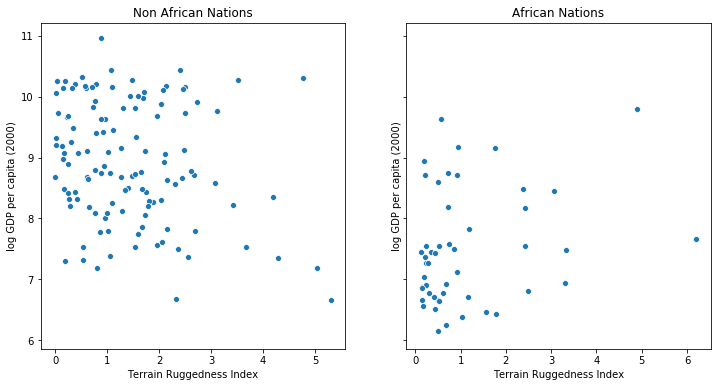

In [3]:
# loading dataset
data_manager = WorldRuggedness()
dataset = data_manager.load_data()
(GDP_non_african, ruggedness_non_african), (GDP_african, ruggedness_african) = dataset

# plotting raw data
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
sns.scatterplot(GDP_non_african, ruggedness_non_african, ax=axes[0])
sns.scatterplot(GDP_african, ruggedness_african, ax=axes[1])
xlabel, ylabel, = 'Terrain Ruggedness Index', 'log GDP per capita (2000)'
axes[0].set(xlabel=xlabel, ylabel=ylabel, title='Non African Nations')
axes[1].set(xlabel=xlabel, ylabel=ylabel, title='African Nations')
plt.plot()

In [4]:
def build_distribution(x):
    """Builds a TensorFlow probability distribution from a given tensor
    # Arguments
        x: TensorFlow tensor from previous layer
    # Returns
        TensorFlow probability distribution with:
            log_prob, prob, ..., etc methods
    """
    # YOUR CODE HERE
    pass

In [5]:
def LinearRegressor(input_shape=[1], build_distribution=build_distribution):
    """Instantiates a linear regression model using Keras API
    # Arguments
        batch_shape: List of Ints e.g. [batch_size, num_features]
        build_distribution: Python function.
    # Returns a tf.Keras model that has output a tensorflow probability distribution
    """
    # YOUR CODE HERE
    pass

In [6]:
def negative_log_likelihood(y_true, predicted_distributions):
    """Calculates the negative log likelihood of the predicted distribution
    ``predicted_distribution`` and the true label value ``y_true``
    # Arguments
        y_true: Numpy array of shape [num_samples, 1].
        predicted_distribution: TensorFlow probability distribution
    """
    # YOUR CODE HERE
    pass

In [ ]:
# fit and plot of models
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
sns.scatterplot(GDP_non_african, ruggedness_non_african, ax=axes[0])
sns.scatterplot(GDP_african, ruggedness_african, ax=axes[1])
xlabel, ylabel, = 'Terrain Ruggedness Index', 'log GDP per capita (2000)'
axes[0].set(xlabel=xlabel, ylabel=ylabel, title='Non African Nations')
axes[1].set(xlabel=xlabel, ylabel=ylabel, title='African Nations')

# iterating over non African and African splits
for axis, data in enumerate(dataset):
    # instantiating model, loss and optimizer
    model = LinearRegressor()
    model.compile(tf.optimizers.Adam(0.01), negative_log_likelihood)
    model.fit(*data, epochs=1000, verbose=False)

    # calculating mean and standard deviations of predicted distribution
    x_test = np.linspace(0, 6, 1000)
    predicted_distribution = model(x_test[..., np.newaxis])
    mean = predicted_distribution.mean()
    standard_deviation = predicted_distribution.stddev()
    positive_standard_deviation = mean + 2. * standard_deviation
    negative_standard_deviation = mean - 2. * standard_deviation

    # plotting predictions
    axes[axis].plot(x_test, mean, 'r--', label='mean')
    axes[axis].plot(x_test, positive_standard_deviation, 'g-', label='mean + 2 stddev')
    axes[axis].plot(x_test, negative_standard_deviation, 'g-', label='mean - 2 stddev')
    axes[axis].legend()
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



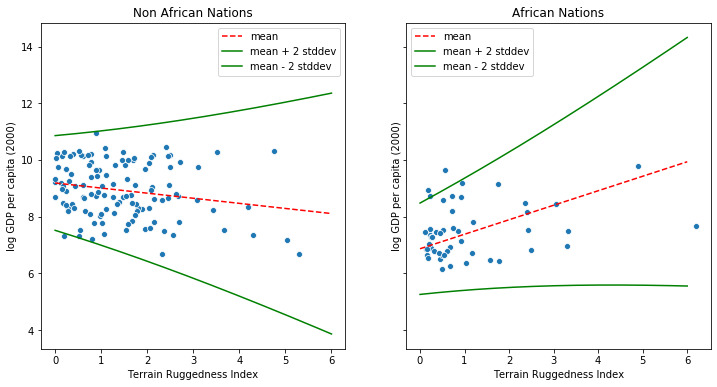

In [9]:
# fit and plot of models
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
sns.scatterplot(GDP_non_african, ruggedness_non_african, ax=axes[0])
sns.scatterplot(GDP_african, ruggedness_african, ax=axes[1])
xlabel, ylabel, = 'Terrain Ruggedness Index', 'log GDP per capita (2000)'
axes[0].set(xlabel=xlabel, ylabel=ylabel, title='Non African Nations')
axes[1].set(xlabel=xlabel, ylabel=ylabel, title='African Nations')

# iterating over non African and African splits
for axis, data in enumerate(dataset):
    # instantiating model, loss and optimizer
    model = LinearRegressor()
    model.compile(tf.optimizers.Adam(0.01), negative_log_likelihood)
    model.fit(*data, epochs=1000, verbose=False)

    # calculating mean and standard deviations of predicted distribution
    x_test = np.linspace(0, 6, 1000)
    predicted_distribution = model(x_test[..., np.newaxis])
    mean = predicted_distribution.mean()
    standard_deviation = predicted_distribution.stddev()
    positive_standard_deviation = mean + 2. * standard_deviation
    negative_standard_deviation = mean - 2. * standard_deviation

    # plotting predictions
    axes[axis].plot(x_test, mean, 'r--', label='mean')
    axes[axis].plot(x_test, positive_standard_deviation, 'g-', label='mean + 2 stddev')
    axes[axis].plot(x_test, negative_standard_deviation, 'g-', label='mean - 2 stddev')
    axes[axis].legend()
plt.show()

## solutions are presented in the cell below (don't look unless absolutely necessary ;) )

In [ ]:
def build_distribution(x):
    """Builds a TensorFlow probability distribution from a given tensor
    # Arguments
        x: TensorFlow tensor from previous layer
    # Returns
        TensorFlow probability distribution with:
            log_prob, prob, ..., etc methods
    """
    mean = x[..., :1]
    standard_deviation = x[..., 1:]
    standard_deviation = 1e-3 + tf.math.softplus(0.05 * standard_deviation)
    return tfd.Normal(mean, standard_deviation)


def LinearRegressor(input_shape=[1], build_distribution=build_distribution):
    """Instantiates a linear regression model using Keras API
    # Arguments
        batch_shape: List of Ints e.g. [batch_size, num_features]
        build_distribution: Python function.
    """
    input_tensor = tf.keras.layers.Input(input_shape)
    x = tf.keras.layers.Dense(2)(input_tensor)
    distribution = tfp.layers.DistributionLambda(build_distribution)(x)
    return tf.keras.Model(input_tensor, distribution, name='LinearRegressor')


def negative_log_likelihood(y_true, predicted_distributions):
    """Calculates the negative log likelihood of the predicted distribution
    ``predicted_distribution`` and the true label value ``y_true``
    # Arguments
        y_true: Numpy array of shape [num_samples, 1].
        predicted_distribution: TensorFlow probability distribution
    """
    log_likelihood = predicted_distributions.log_prob(y_true)
    return - log_likelihood